# Megafon 

### Steps

1. First look at data
    - read train test
    - common ids
    - read features (20 GB)
    - 



1. First look at data
    - read train test

In [17]:
import pandas as pd
import numpy as np
import dask.dataframe as dd  # for big file feature.csv ~20 Gb
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('data/data_train.csv', index_col=0)
train.head(2)

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831653 entries, 0 to 831652
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        831653 non-null  int64  
 1   vas_id    831653 non-null  float64
 2   buy_time  831653 non-null  int64  
 3   target    831653 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 31.7 MB


- look at Target distribution

0.0    0.927631
1.0    0.072369
Name: target, dtype: float64

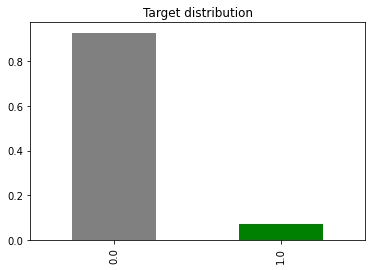

In [49]:
(train['target'].value_counts()/train['target'].shape[0]).\
    plot(kind='bar', title='Target distribution', color = ['grey', 'green']);
train['target'].value_counts()/train['target'].shape

not very balanced sample

In [8]:
test = pd.read_csv('data/data_test.csv', index_col=0)
test.head(2)

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71231 entries, 0 to 71230
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        71231 non-null  int64  
 1   vas_id    71231 non-null  float64
 2   buy_time  71231 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.2 MB


- common ids

There are extra indexes in the `feature.csv` file. Need to select rows without them.

In [55]:
train_ids = set(train.id.tolist())
test_ids = set(test.id.tolist())
common_ids = train_ids.union(test_ids)

print(f'Number train indexes: {len(train_ids)} \n\
Number test indexes: {len(test_ids)} \nNumber common indexes: {len(common_ids)}')

Number train indexes: 806613 
Number test indexes: 70152 
Number common indexes: 872577


- read features (20 GB)

In [18]:
features = dd.read_csv('data/features.csv', sep='\t')
features

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252
npartitions=351,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [20]:
features = features[features.id.isin(common_ids)].compute()
features.head(2)

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
13,13,2046132,1534712400,300.820029,1599.480888,286.879214,1585.013202,281.461754,1563.90821,-16.08618,...,-977.373846,-613.770792,-25.996269,-35.630448,-295.747724,-17.832889,-0.694428,-4.175933,-0.45614,0.0
16,16,2050810,1540760400,-86.209971,91.820888,-84.480786,110.333202,-89.898246,89.22821,-16.08618,...,-977.373846,-613.770792,-23.996269,190.369552,-286.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [21]:
features.drop(columns='Unnamed: 0', inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902389 entries, 13 to 12844
Columns: 255 entries, id to 252
dtypes: float64(253), int64(2)
memory usage: 1.7 GB


- time

Changing time format

In [131]:
train['buy_time'] = pd.to_datetime(train['buy_time'], unit='s')
test['buy_time'] = pd.to_datetime(test['buy_time'], unit='s')
features['buy_time'] = pd.to_datetime(features['buy_time'], unit='s')
train.head(2)

,id,vas_id,buy_time,target
0,540968,8.0,2018-09-16 21:00:00,0.0
1,1454121,4.0,2018-07-15 21:00:00,0.0


In [132]:
features.rename( columns={'buy_time':'update_info_time' } ,inplace=True) 

Sorting the target variable by time and visualization

In [42]:
time_buy = train[train['target'] == 1].buy_time.sort_values(ascending=False).value_counts(sort=False)
time_notbuy = train[train['target'] == 0].buy_time.sort_values(ascending=False).value_counts(sort=False)

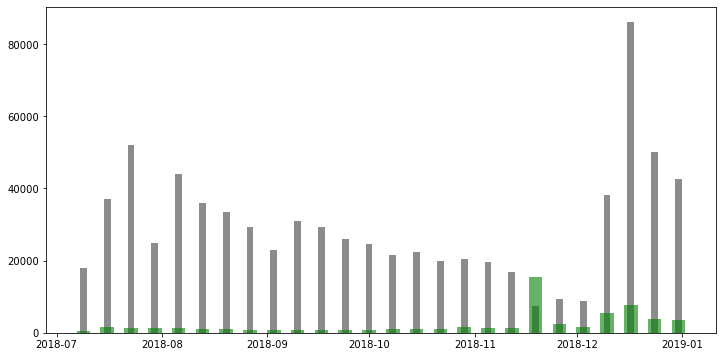

In [45]:
plt.figure(figsize=(12, 6))
plt.bar(time_notbuy.index, time_notbuy, width=2, color='grey', alpha=0.9)
plt.bar(time_buy.index, time_buy, width=4, color='g', alpha=0.6)
# plt.yscale('log')
plt.show()

Seasonal distribution of purchases and **peak** sales on the same day in November (Sale). Using incomplete seasonal data to evaluate the model is not the best solution. But we don't have another data.

In [116]:
def unique_ids(df):
    return df.groupby(by='id')['id'].agg('count').value_counts()

In [117]:
unique_ids(train)

1    781611
2     24964
3        38
Name: id, dtype: int64

In [118]:
unique_ids(test)

1    69092
2     1041
3       19
Name: id, dtype: int64

In [119]:
unique_ids(features)

1    842765
2     29812
Name: id, dtype: int64

Most of the indices are unique, but there are those that occur two or three times.

In [123]:
thrice_ids = train.groupby(by='id')['id'].agg('count')[train.groupby(by='id')['id'].agg('count') == 3].index.tolist()

In [157]:
tr_temp = train[train['id'].isin(set(thrice_ids) & common_ids)].head(100)
tr_temp.head(9)

,id,vas_id,buy_time,target
21564,1144355,4.0,2018-12-16 21:00:00,0.0
21565,1144355,4.0,2018-12-23 21:00:00,0.0
21566,1144355,6.0,2018-12-16 21:00:00,1.0
24239,3475168,1.0,2018-12-16 21:00:00,0.0
24240,3475168,4.0,2018-11-18 21:00:00,0.0
24241,3475168,6.0,2018-11-18 21:00:00,1.0
24631,271692,2.0,2018-11-25 21:00:00,0.0
24632,271692,4.0,2018-12-30 21:00:00,0.0
24633,271692,6.0,2018-12-30 21:00:00,1.0


Perform an asof merge.

In [188]:
def merge_asof(left, right, ids):
    left = pd.merge_asof(left.sort_values(by=['buy_time']), 
                         right[features.id.isin(ids)].sort_values(by=['update_info_time']), 
                         left_on='buy_time', 
                         right_on='update_info_time', 
                         by='id',
                         direction='nearest'  # with nearest time
                         )
    return left

In [194]:
%%time
train = merge_asof(train, features, train_ids)
train.head(2)

CPU times: user 7.73 s, sys: 15.4 s, total: 23.1 s
Wall time: 32.3 s


,id,vas_id,buy_time,target,update_info_time,0,1,2,3,4,...,243,244,245,246,247,248,249,250,251,252
0,2582523,2.0,2018-07-08 21:00:00,0.0,2018-12-16 21:00:00,314.560029,9.290888,342.989214,7.523202,337.571754,...,6488.626154,-574.770792,-24.996269,121.369552,142.252276,-16.832889,-0.694428,-11.175933,-0.45614,0.0
1,1292549,2.0,2018-07-08 21:00:00,0.0,2018-09-16 21:00:00,93.880029,-217.499112,79.939214,-270.106798,74.521754,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0


In [196]:
%%time
test = merge_asof(test, features, test_ids)
test.head(2)

CPU times: user 840 ms, sys: 3.22 s, total: 4.06 s
Wall time: 5.7 s


,id,vas_id,buy_time,update_info_time,0,1,2,3,4,5,...,243,244,245,246,247,248,249,250,251,252
0,2905850,5.0,2019-01-06 21:00:00,2018-09-09 21:00:00,326.930029,227.410888,312.989214,200.223202,307.571754,179.11821,...,-464.373846,-104.770792,-25.996269,-18.630448,-209.747724,-15.832889,-0.694428,-2.175933,-0.45614,0.0
1,31619,2.0,2019-01-06 21:00:00,2018-09-09 21:00:00,-96.799971,100.290888,-62.040786,250.953202,-67.458246,229.84821,...,-977.373846,-613.770792,-25.996269,-37.630448,-306.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
